In [480]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import seaborn as sns 

In [481]:
heart_disease_data = pd.read_csv('heart.csv')

In [482]:
heart_disease_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [483]:
#check the data types if the columns
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [484]:
#check to see if there are any null values 
heart_disease_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [485]:
heart_disease_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [486]:
heart_disease_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [495]:
#Set the genders apart to see if there is any findings
heart_disease_data_male = heart_disease_data.loc[heart_disease_data.Sex=='M']
heart_disease_data_female = heart_disease_data.loc[heart_disease_data.Sex=='F']


Text(0.5, 1.0, 'Exploring the chest pain types')

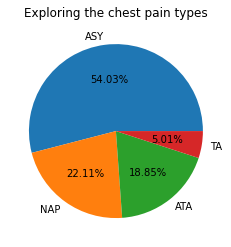

In [496]:
#Exploring the chest pain types 
ChestPainType_pie_chart_index = heart_disease_data.ChestPainType.value_counts().index
ChestPainType_pie_chart_values = heart_disease_data.ChestPainType.value_counts().values
plt.pie(ChestPainType_pie_chart_values, labels=ChestPainType_pie_chart_index, autopct='%1.2f%%')
plt.title("Exploring the chest pain types")

Text(0.5, 1.0, 'Exploring the chest pain types -- Male')

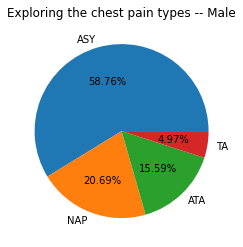

In [497]:
#Exploring the chest pain types 
ChestPainType_pie_chart_index_M = heart_disease_data_male.ChestPainType.value_counts().index
ChestPainType_pie_chart_values_M = heart_disease_data_male.ChestPainType.value_counts().values
plt.pie(ChestPainType_pie_chart_values_M, labels=ChestPainType_pie_chart_index_M, autopct='%1.2f%%')
plt.title("Exploring the chest pain types -- Male")

Text(0.5, 1.0, 'Exploring the chest pain types -- Female')

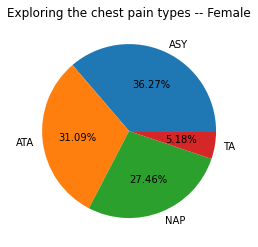

In [498]:
#Exploring the chest pain types 
ChestPainType_pie_chart_index_F = heart_disease_data_female.ChestPainType.value_counts().index
ChestPainType_pie_chart_values_F = heart_disease_data_female.ChestPainType.value_counts().values
plt.pie(ChestPainType_pie_chart_values_F, labels=ChestPainType_pie_chart_index_F, autopct='%1.2f%%')
plt.title("Exploring the chest pain types -- Female")

Text(0.5, 1.0, 'Exploring the Resting ECG types')

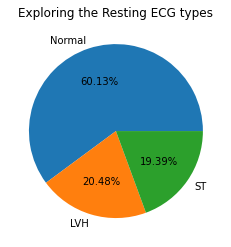

In [488]:
#Exploring the Resting ECG 
RestingECG_pie_chart_index = heart_disease_data.RestingECG.value_counts().index
RestingECG_pie_chart_values = heart_disease_data.RestingECG.value_counts().values
plt.pie(RestingECG_pie_chart_values, labels=RestingECG_pie_chart_index, autopct='%1.2f%%')
plt.title("Exploring the Resting ECG types")

Text(0.5, 1.0, 'Exploring the Resting ECG types -- Male')

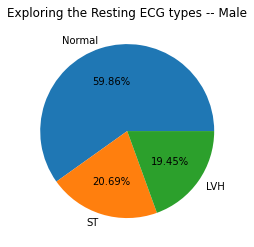

In [499]:
#Exploring the Resting ECG Male
RestingECG_pie_chart_index_M = heart_disease_data_male.RestingECG.value_counts().index
RestingECG_pie_chart_values_M = heart_disease_data_male.RestingECG.value_counts().values
plt.pie(RestingECG_pie_chart_values_M, labels=RestingECG_pie_chart_index_M, autopct='%1.2f%%')
plt.title("Exploring the Resting ECG types -- Male")

Text(0.5, 1.0, 'Exploring the Resting ECG types -- Male')

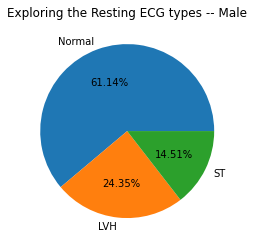

In [500]:
#Exploring the Resting ECG Female
RestingECG_pie_chart_index_F = heart_disease_data_female.RestingECG.value_counts().index
RestingECG_pie_chart_values_F = heart_disease_data_female.RestingECG.value_counts().values
plt.pie(RestingECG_pie_chart_values_F, labels=RestingECG_pie_chart_index_F, autopct='%1.2f%%')
plt.title("Exploring the Resting ECG types -- Male")

In [502]:
#Minimum age of data participants
heart_disease_data["Age"].min()

28

In [503]:
#Minimum age of data participants
heart_disease_data["Age"].max()

77

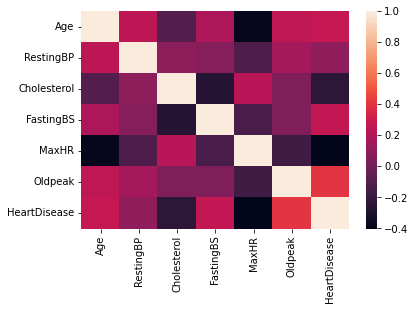

In [507]:
#Heat map for correlation coefficient
corr = heart_disease_data.corr()
sns.heatmap(corr)

In [508]:
heart_disease_data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [509]:
# Transform Chest Pain Type
def changeChestPainType(ChestPainType):
    if ChestPainType == "ASY":
        return 0
    elif ChestPainType == "NAP":
        return 1
    elif ChestPainType == "ATA":
        return 2
    else:
        return 3

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['ChestPainType'] = heart_disease_data['ChestPainType'].apply(changeChestPainType)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,1,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,2,130,283,0,ST,98,N,0.0,Up,0
3,48,F,0,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,Normal,122,N,0.0,Up,0


In [510]:
# Transform Resting ECG
def changeRestingECG(RestingECG):
    if RestingECG == "Normal":
        return 0
    elif RestingECG == "LVH":
        return 1
    else:
        return 2

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['RestingECG'] = heart_disease_data['RestingECG'].apply(changeRestingECG)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,0,172,N,0.0,Up,0
1,49,F,1,160,180,0,0,156,N,1.0,Flat,1
2,37,M,2,130,283,0,2,98,N,0.0,Up,0
3,48,F,0,138,214,0,0,108,Y,1.5,Flat,1
4,54,M,1,150,195,0,0,122,N,0.0,Up,0


In [511]:
# Transform ST SLope
def changeST_Slope(ST_Slope):
    if ST_Slope == "Flat":
        return 0
    elif ST_Slope == "Up":
        return 1
    else:
        return 2

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['ST_Slope'] = heart_disease_data['ST_Slope'].apply(changeST_Slope)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,2,140,289,0,0,172,N,0.0,1,0
1,49,F,1,160,180,0,0,156,N,1.0,0,1
2,37,M,2,130,283,0,2,98,N,0.0,1,0
3,48,F,0,138,214,0,0,108,Y,1.5,0,1
4,54,M,1,150,195,0,0,122,N,0.0,1,0


In [512]:
# Transform Sex
def changeSex(sex):
    if sex == "M":
        return 0
    
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
heart_disease_data['Sex'] = heart_disease_data['Sex'].apply(changeSex)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,N,0.0,1,0
1,49,1,1,160,180,0,0,156,N,1.0,0,1
2,37,0,2,130,283,0,2,98,N,0.0,1,0
3,48,1,0,138,214,0,0,108,Y,1.5,0,1
4,54,0,1,150,195,0,0,122,N,0.0,1,0


In [513]:
# Transform ExerciseAngina
def changeExerciseAngina(ExerciseAngina):
    if ExerciseAngina == "Y":
        return 0
    
    else:
        return 1

heart_disease_data['ExerciseAngina'] = heart_disease_data['ExerciseAngina'].apply(changeExerciseAngina)
heart_disease_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,1,0.0,1,0
1,49,1,1,160,180,0,0,156,1,1.0,0,1
2,37,0,2,130,283,0,2,98,1,0.0,1,0
3,48,1,0,138,214,0,0,108,0,1.5,0,1
4,54,0,1,150,195,0,0,122,1,0.0,1,0


In [514]:
#setting the x and y values
y = heart_disease_data['HeartDisease']
X = heart_disease_data.drop(['HeartDisease'], axis = 1)
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [515]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,1,0.0,1
1,49,1,1,160,180,0,0,156,1,1.0,0
2,37,0,2,130,283,0,2,98,1,0.0,1
3,48,1,0,138,214,0,0,108,0,1.5,0
4,54,0,1,150,195,0,0,122,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,1,1.2,0
914,68,0,0,144,193,1,0,141,1,3.4,0
915,57,0,0,130,131,0,0,115,0,1.2,0
916,57,1,2,130,236,0,1,174,1,0.0,0


In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [517]:
print(f'X_train : {X_train.shape}')

X_train : (734, 11)


In [518]:
print(f'y_train : {y_train.shape}')

y_train : (734,)


In [519]:
print(f'X_test : {X_test.shape}')

X_test : (184, 11)


In [520]:
print(f'X_test : {X_test.shape}')

X_test : (184, 11)


In [521]:
heart_disease_data.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [522]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [523]:
# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Linear Regression

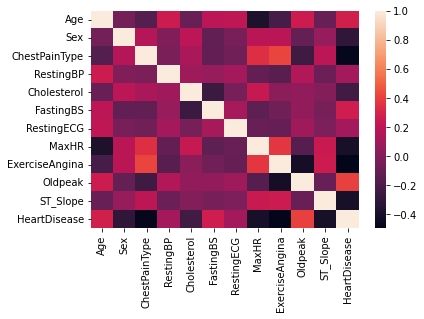

In [524]:
#Heat map for correlation coefficient
corr = heart_disease_data.corr()
sns.heatmap(corr)

In [363]:
model = LinearRegression()

In [364]:
# Fit the model to the training data, and calculate the scores for the training and testing data.

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5079445212217379
Testing Score: 0.574348275467222


In [365]:
#Quantifying our model by performing MSE and R2 score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.11816820462165098
R-squared (R2): 0.5218783269081227


In [366]:
#As we can see from above, the MSE score is not close to one, and the R2 score is low

In [367]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [368]:
lasso.fit(X_train, y_train)

Lasso()

In [369]:
y_pred = lasso.predict(X_test)

In [370]:
mean_squared_error(y_test, y_pred)

0.2080433302324024

In [371]:
#R score
lasso.score(X_test, y_test)

0.13470331838474003

In [372]:
KNN

NameError: name 'KNN' is not defined

k: 1, Train/Test Score: 1.000/0.842
k: 3, Train/Test Score: 0.903/0.908
k: 5, Train/Test Score: 0.873/0.913
k: 7, Train/Test Score: 0.875/0.918
k: 9, Train/Test Score: 0.873/0.918
k: 11, Train/Test Score: 0.868/0.924
k: 13, Train/Test Score: 0.864/0.913
k: 15, Train/Test Score: 0.868/0.902
k: 17, Train/Test Score: 0.868/0.913
k: 19, Train/Test Score: 0.861/0.908


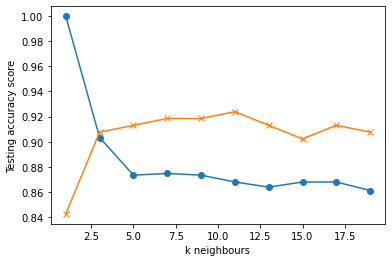

In [373]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbours")
plt.ylabel("Testing accuracy score")
plt.show()

In [374]:
# K: 7 is the best choice after trial and error of the k neighbours
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.918


In [437]:
print('k=7 Test Acc: %.3f' % knn.score(X_train, y_train))

k=7 Test Acc: 0.624


C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [375]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [376]:
confusion_matrix(y_true, y_pred)

array([[ 68,   6],
       [  9, 101]], dtype=int64)

In [377]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       0.94      0.92      0.93       110

    accuracy                           0.92       184
   macro avg       0.91      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184



In [378]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [379]:
input_data = (38,0,1,138,175,0,0,173,1,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
input_data_reshape

array([[ 38.,   0.,   1., 138., 175.,   0.,   0., 173.,   1.,   0.,   1.]])

In [380]:

#standardise the data
std_data = X_scaler.transform(input_data_reshape)
prediction = knn.predict(std_data)


if (prediction[0] ==0):
    print("The person does not have heart disease")
else:
    print("The person has heart disease")

The person does not have heart disease


C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Logistic Regression

In [381]:
logistic_Model = LogisticRegression()

In [382]:
logistic_Model.fit(X_train, y_train)

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [383]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8474114441416893
Testing Data Score: 0.8804347826086957


In [384]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = logistic_Model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[67,  7],
       [15, 95]], dtype=int64)

In [385]:
# COnfusion matrix accuracy score
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8804347826086957


Logistic Regression hyperparameters

In [386]:
params = [
    {'penalty' : ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
     'max_iter': [100,1000,2500,5000,10000],
    }
]

In [387]:
LR_with_params = GridSearchCV(logistic_Model, param_grid=params, cv=3, verbose=True, n_jobs=-1)

In [388]:
best_LR_params = LR_with_params.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nickj\anaconda3\anacondatake

In [389]:
best_LR_params.best_estimator_

LogisticRegression(C=1, class_weight={0: 0.5, 1: 0.5})

SVM

In [390]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [391]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.902


In [392]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            ))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        74
           1       0.93      0.91      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [393]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [394]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.902


In [438]:
print('Test Acc: %.3f' % model.score(X_train, y_train))

Test Acc: 0.853


In [395]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [396]:
accuracy = grid_search.best_score_
accuracy

0.8447982228804147

In [397]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [401]:
SVC_best_params = SVC(C=1, kernel='linear')

In [402]:
SVC_best_params.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [404]:
print('Test Acc: %.3f' % SVC_best_params.score(X_test, y_test))

Test Acc: 0.902


In [439]:
print('Train Acc: %.3f' % SVC_best_params.score(X_train, y_train))

Test Acc: 0.853


Decision Tree

In [405]:
clf = DecisionTreeClassifier(random_state=0 )
clf = clf.fit(X_train, y_train)

In [406]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [407]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [408]:
accuracy_score(y_test, predictions)

0.8152173913043478

In [409]:
confusion_matrix(y_test, predictions, labels=[0,1])

array([[64, 10],
       [24, 86]], dtype=int64)

In [410]:
#Decision tree hyperparameters

In [411]:
parameters = {'max_depth': (10,30,50,70,90,100),
             'criterion': ('gini', 'entropy'),
             "max_features": ("auto", "sqrt", "log2"),
             'min_samples_split': (2,4,6),
             'max_depth': (3,5,7,9,10),}

In [412]:
decisiontreegrid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True )

In [413]:
decisiontreegrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [414]:
decisiontreegrid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

In [415]:
DT_model = DecisionTreeClassifier(random_state=0, max_depth=5, max_features='sqrt', min_samples_split=4)

In [416]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=4,
                       random_state=0)

In [417]:
#New model fitted score on training data
DT_model.score(X_train, y_train)

0.8460490463215259

In [418]:
##New model fitted score on testing data

DT_model.score(X_test, y_test)

0.8043478260869565

Random Forrest

In [419]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [420]:
RF_params = {'n_estimators': n_estimators,
            'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap
             
            }

In [421]:
RF_model = RandomForestClassifier()

In [422]:
RF_grid = GridSearchCV(estimator=RF_model, param_grid =RF_params, cv=3, verbose=2, n_jobs = 4 )

In [423]:
RF_grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [424]:
RF_grid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 41}

In [425]:
RF_grid_best_params = RF_grid.best_params_
RF_grid_best_params

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 41}

In [426]:
RF_grid_best_params = { 'max_depth': [6],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split':[5],
 'n_estimators': [33],
 'bootstrap': [True]
    
}

In [427]:
print(f'Training Accuracy : {RF_grid.score(X_train, y_train)}')

Training Accuracy : 0.9182561307901907


In [428]:
print(f'Testing Accuracy : {RF_grid.score(X_test, y_test)}')

Testing Accuracy : 0.8967391304347826


In [429]:
RF_grid_params = GridSearchCV(estimator=RF_model, param_grid =RF_grid_best_params, cv=3, verbose=2, n_jobs = 4 )

In [430]:
RF_grid_params.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [6],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [5], 'n_estimators': [33]},
             verbose=2)

In [431]:
print(f'Training Accuracy : {RF_grid_params.score(X_train, y_train)}')

Training Accuracy : 0.9250681198910081


In [432]:
print(f'Testing Accuracy : {RF_grid_params.score(X_test, y_test)}')

Testing Accuracy : 0.8913043478260869


Neural Network

In [436]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=11))
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customise metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=20)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/20
23/23 [==============================] - 0s 871us/step - loss: 0.6862 - accuracy: 0.5504
Epoch 2/20
23/23 [==============================] - 0s 978us/step - loss: 0.5867 - accuracy: 0.7221
Epoch 3/20
23/23 [==============================] - 0s 853us/step - loss: 0.5092 - accuracy: 0.7807
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.7997
Epoch 5/20
23/23 [==============================] - 0s 806us/step - loss: 0.4138 - accuracy: 0.8174
Epoch 6/20
23/23 [==============================] - 0s 852us/step - loss: 0.3919 - accuracy: 0.8283
Epoch 7/20
23/23 [==============================] - 0s 842us/step - loss: 0.3773 - accuracy: 0.8338
Epoch 8/20
23/23 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8379
Epoch 9/20
23/23 [==============================] - 0s 792us/step - loss: 0.3599 - accuracy: 0.8406
Epoch 10/20
23/23 [==============================] - 0s 890us/step - loss: 0.3520 - accuracy: 0.8447
Epo

In [ ]:
#I tried different amount of layers and different types of epochs and nodes, the above is the best score I could get